# Signal processing

This notebook provides an overview of the functions provided by the elephant `signal_processing` module.

In [29]:
import neo
import numpy as np
import quantities as pq
import elephant
from elephant.signal_processing import *
from elephant.datasets import download_datasets
import matplotlib.pyplot as plt

All measures presented here require one or two `neo.AnalogSignal` objects as input. For this, we use an electrophysiology recording, and this data file contains one trial of an experiment.

In [30]:
# TODO: this is just for development and using local data, delete before merging
from pathlib import Path
filepath = Path('~/gin/elephant-data/tutorials/tutorial_signal_processing/data/i140703-001_single_trial.nix').expanduser()

# Download data
# repo_path='tutorials/tutorial_signal_processing/data/i140703-001_single_trial.nix'
# filepath=download_datasets(repo_path)


In [31]:
with neo.NixIO(f"{filepath}", 'ro') as file:
    block = file.read_block()

signals = block.segments[0].analogsignals[0]

## 1. Z-Score
The recordings from the different electrodes might have different offsets and amplitudes. So, it's helpful for the later analysis to first z-score the signals. This way, all electrodes are normalized to a common range of values.

Here, we use the `zscore` function  to normalize the signal. The `inplace` option is set to `False` to avoid overwriting the original signal, as it is required for subsequent examples.

In [32]:
signal = signals[:,1]

z_scored_signal = zscore(signal, inplace=False)

The result is the z-scored signal, as shown in the plots below.

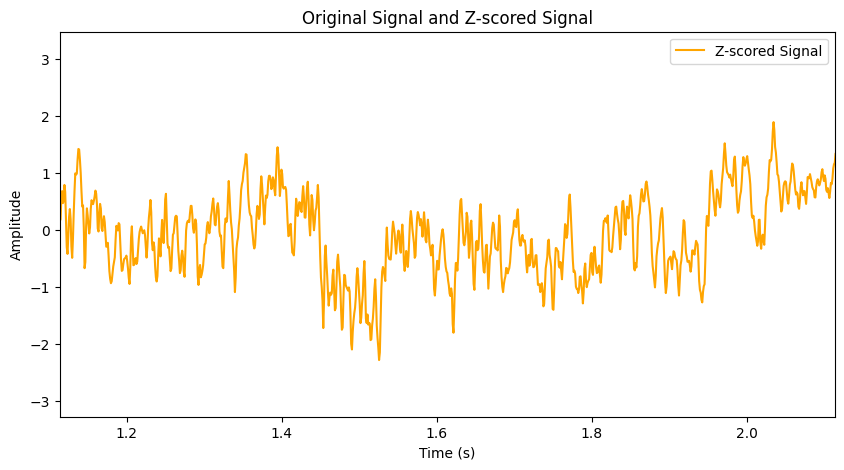

In [45]:
# Plot the original signal
plt.figure(figsize=(10, 5))

# Plot the z-scored signal
plt.plot(z_scored_signal.times, z_scored_signal, label='Z-scored Signal', color='orange')

plt.xlabel(f'Time ({signal.times.dimensionality})')
plt.ylabel('Amplitude')
plt.title('Original Signal and Z-scored Signal')
plt.legend()
plt.xlim(signal.t_start, signal.t_start + 1*pq.s)

# Show the plot
plt.show()

## 2. Power Spectrum
Before delving into advanced methods, calculating and visualizing the power spectrum is a fundamental step in analyzing analog signals. Let's compute and plot it for the first trial.

In [ ]:
power_spectrum_f, power_spectrum_x = elephant.spectral.welch_psd(signals)
power_spectrum_x.shape

(96, 301)

Elephant is using the [*Welch* algorithm](https://elephant.readthedocs.io/en/latest/reference/spectral.html#elephant.spectral.welch_psd) to calculate the spectrum. It calculates the power spectra for all channels in the AnalogSignal object individually. For a better overview we can also look at the average power over all channels.

In [37]:
avg_power_spectrum_x = np.nanmean(power_spectrum_x, axis=0)

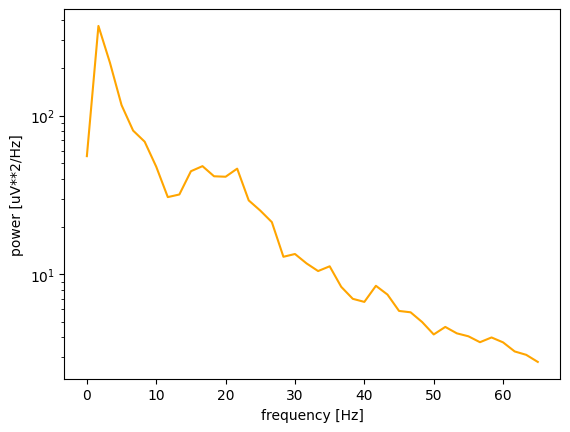

In [44]:
plt.semilogy(power_spectrum_f[:40], avg_power_spectrum_x[:40], color='orange')

plt.xlabel(f"frequency [{power_spectrum_f.dimensionality}]")
plt.ylabel(f"power [{power_spectrum_x.dimensionality}]");

From the power spectrum we can guess the dominant frequencies:  **10 - 30 Hz** which corresponds to the Beta band.